<a href="https://colab.research.google.com/github/abdullatif14/Hypothesis-Testing-week-4/blob/main/Hypothesis_Testing_week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hypothesis Testing


##Defining the question

We are to perform a hypothesis testing on Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.The claims can be;

Is the number of Bluecars taken in area X different than in area Y? 

Is it greater in area X than in area Z?

##Metric for Success
The project will be successful if we do the following:
1. Data Cleaning( dealing with outliers, anomalies and missing data)

2. Univariate Analysis

3. Bivariate Analysis

4. Implementation through hypothesis Testing 

##Understanding the context

The provided dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network (car-sharing and recharging).

We are to investiagte claims about the blue cars in the Autolib electric car-sharing service company.


##Importing our Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##Reading the Data

In [ ]:
data = '/content/columns_explanation.xlsx'
df1 = pd.read_excel(r'/content/columns_explanation.xlsx')
print(df1)

               Column name                                        explanation
0              Postal code                 postal code of the area (in Paris)
1                     date                        date of the row aggregation
2      n_daily_data_points  number of daily data poinst that were availabl...
3                dayOfWeek     identifier of weekday (0: Monday -> 6: Sunday)
4                 day_type                                 weekday or weekend
5       BlueCars_taken_sum    Number of bluecars taken that date in that area
6    BlueCars_returned_sum  Number of bluecars returned that date in that ...
7         Utilib_taken_sum      Number of Utilib taken that date in that area
8      Utilib_returned_sum   Number of Utilib returned that date in that area
9      Utilib_14_taken_sum  Number of Utilib 1.4 taken that date in that area
10  Utilib_14_returned_sum  Number of Utilib 1.4 returned that date in tha...
11         Slots_freed_sum  Number of recharging slots released 

In [ ]:
#reading our csv file
dataset = '/content/autolib_daily_events_postal_code.csv'
df = pd.read_csv('/content/autolib_daily_events_postal_code.csv')
df.head()



,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


##Checking the Data

In [ ]:
df.shape

(16085, 13)

In [ ]:
df.info

<bound method DataFrame.info of        Postal code       date  ...  Slots_freed_sum  Slots_taken_sum
0            75001   1/1/2018  ...               22               20
1            75001   1/2/2018  ...               23               22
2            75001   1/3/2018  ...               27               27
3            75001   1/4/2018  ...               25               21
4            75001   1/5/2018  ...               18               20
...            ...        ...  ...              ...              ...
16080        95880  6/15/2018  ...                0                0
16081        95880  6/16/2018  ...                0                0
16082        95880  6/17/2018  ...                0                0
16083        95880  6/18/2018  ...                0                0
16084        95880  6/19/2018  ...                0                0

[16085 rows x 13 columns]>

In [ ]:
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [ ]:
df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


##Data Cleaning

In [ ]:
#checking the null values
df.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [ ]:
#checkinng for duplicates
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.replace(' ','_')
df.columns

Index(['Postal_code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


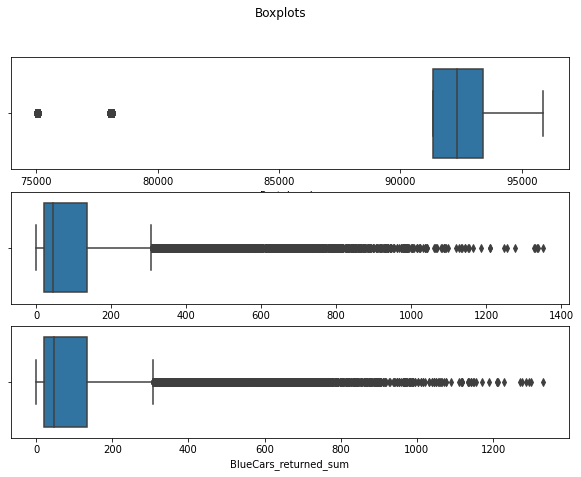

In [ ]:
#checking for outliers and anomalies
fig, ((ax1, ax2, ax3)) = plt.subplots(3, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(df['Postal_code'], ax=ax1)
sns.boxplot(df['BlueCars_taken_sum'], ax=ax2)
sns.boxplot(df['BlueCars_returned_sum'],ax=ax3)

plt.show()

In [ ]:
#checking the total no of bluecars 
df.BlueCars_returned_sum.value_counts()

13      260
12      254
10      249
9       243
11      242
       ... 
556       1
588       1
604       1
628       1
1287      1
Name: BlueCars_returned_sum, Length: 929, dtype: int64

In [ ]:
df.BlueCars_taken_sum.value_counts()

12      261
14      253
9       247
11      246
13      238
       ... 
833       1
825       1
809       1
801       1
1335      1
Name: BlueCars_taken_sum, Length: 932, dtype: int64

#Univariate analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


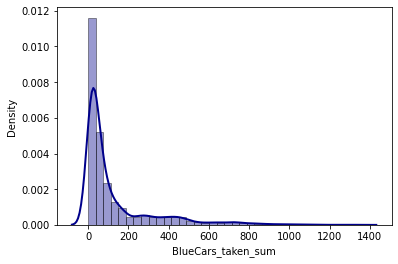

In [ ]:
sns.distplot(df['BlueCars_taken_sum'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


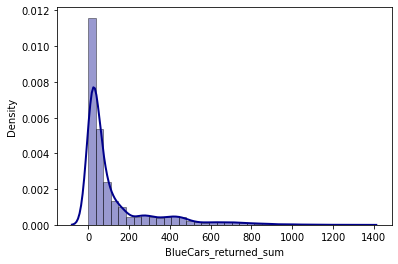

In [ ]:
sns.distplot(df['BlueCars_returned_sum'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

weekday    11544
weekend     4541
Name: day_type, dtype: int64
 
 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


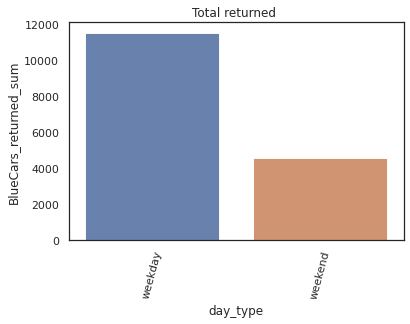

In [ ]:
returned = df['day_type'].value_counts()
print(returned)
print(' ')
print(' ')
sns.set(style="white")
sns.barplot(returned.index, returned.values, alpha=0.9)
plt.title('Total returned ')
plt.ylabel('BlueCars_returned_sum', fontsize=12)
plt.xlabel('day_type', fontsize=12)
plt.xticks(rotation = 75)
plt.show()

In [ ]:
df.BlueCars_returned_sum.describe()

count    16085.000000
mean       125.912714
std        185.501535
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1332.000000
Name: BlueCars_returned_sum, dtype: float64

weekday    11544
weekend     4541
Name: day_type, dtype: int64
 
 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


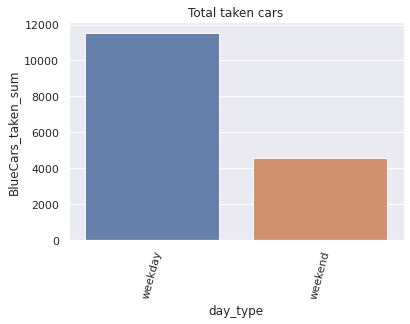

In [ ]:
bluecars = df['day_type'].value_counts()
print(bluecars)
print(' ')
print(' ')
sns.set(style="darkgrid")
sns.barplot(bluecars.index, bluecars.values, alpha=0.9)
plt.title('Total taken cars')
plt.ylabel('BlueCars_taken_sum', fontsize=12)
plt.xlabel('day_type', fontsize=12)
plt.xticks(rotation = 75)
plt.show()

In [ ]:
df.BlueCars_taken_sum.describe()

count    16085.000000
mean       125.926951
std        185.426579
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1352.000000
Name: BlueCars_taken_sum, dtype: float64

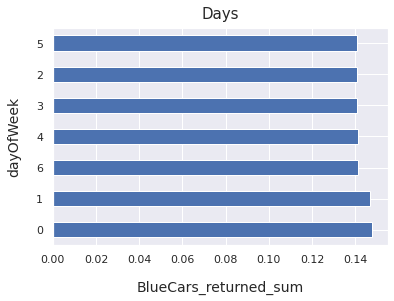

In [ ]:
(df['dayOfWeek'].value_counts(normalize=True)).plot.barh()

# labelling the bar chart 
plt.title('Days', fontsize=15, y=1.015)
# labelling the x axis 
plt.xlabel('BlueCars_returned_sum', fontsize=14, labelpad=15)
# labelling the y axis
plt.ylabel('dayOfWeek', fontsize=14, labelpad=15)
#display bar chart
plt.show()

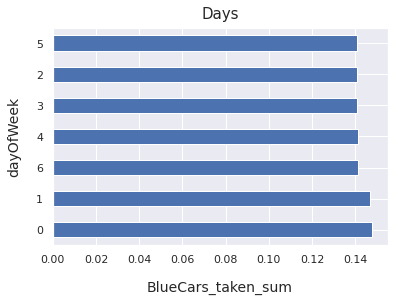

In [ ]:
(df['dayOfWeek'].value_counts(normalize=True)).plot.barh()


plt.title('Days', fontsize=15, y=1.015)

plt.xlabel('BlueCars_taken_sum', fontsize=14, labelpad=15)

plt.ylabel('dayOfWeek', fontsize=14, labelpad=15)

plt.show()

#Bivariate analysis

In [ ]:
#checking for correlation coefficiency
corr = df['BlueCars_taken_sum'].corr(df['BlueCars_returned_sum'])
print(corr)

#it suggests a strong positive correlation

0.9986597051672199


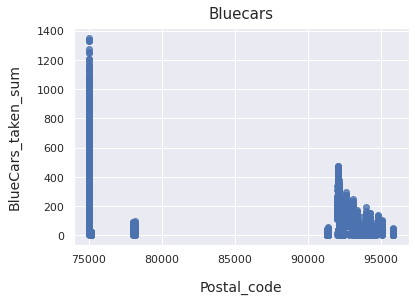

In [ ]:
#creating a sctater plot for postal and the blue cars
sns.regplot(x = df["Postal_code"], y = df["BlueCars_taken_sum"], fit_reg=False)

# Givint the scatterplot a title
plt.title('Bluecars', fontsize=15, y=1.015)
# Labelling the x axis
plt.xlabel('Postal_code', fontsize=14, labelpad=15)
# Labelling the y axis
plt.ylabel('BlueCars_taken_sum', fontsize=14, labelpad=15)
# Displaying the scatterplot
plt.show()

#There is no relation between the points(The postal code and the Blue cars)

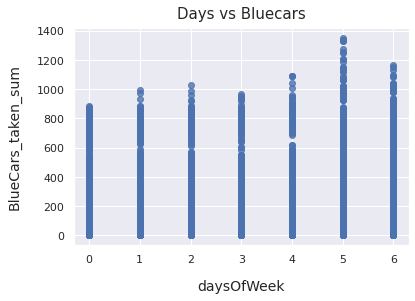

In [42]:
# scatter plot
sns.regplot(x = df["dayOfWeek"], y = df["BlueCars_taken_sum"], fit_reg=False)

# Givint the scatterplot a title
plt.title('Days vs Bluecars', fontsize=15, y=1.015)
# Labelling the x axis
plt.xlabel('daysOfWeek', fontsize=14, labelpad=15)
# Labelling the y axis
plt.ylabel('BlueCars_taken_sum', fontsize=14, labelpad=15)
# Displaying the scatterplot
plt.show()

In [ ]:
# Calculating the pearson coefficient
pearson_coeff = df["Postal_code"].corr(df["BlueCars_taken_sum"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = df["Postal_code"].corr(df["BlueCars_taken_sum"]) 
print(coeff)

#This signifies to be A strong negative correlation

-0.6980199787851213
-0.6980199787851213


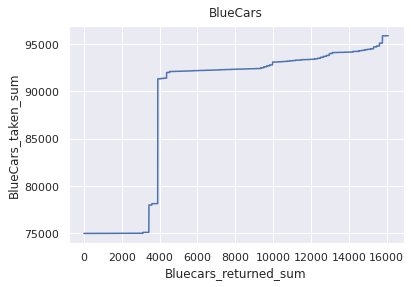

In [41]:
# Plotting our line graph
df["Postal_code"].plot()

# Giving a title to our line graph
plt.title("BlueCars", fontsize=12, y=1.015)

# Labelling the y-axis
plt.ylabel('BlueCars_taken_sum')

# Labelling the x-axis
plt.xlabel('Bluecars_returned_sum')

# Displaying our graph
plt.show()

#Hypothesis Testing

In [45]:
# importing random
from numpy.random import randn
# imporing the shapiro function
from scipy.stats import shapiro 

# generating univariate observations
df = 5 * randn(100) + 50

# testing for normality
stat, p = shapiro(df)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')
  


Statistics=0.978, p=0.085
Sample looks Gaussian


In [47]:
print(u'/Hu2082O')

/Hu2082O
